In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import os
from deepx import resnet, dataset
import jax
import cardiax
import matplotlib.pyplot as plt
import jax.numpy as jnp


def get_ap_series(ys):
    return ys[0, 0, :, -1]

root = "experiments/training/data"
make_dataset = lambda subdir, n: dataset.Dataset(
    folder=os.path.join(root, subdir),
    frames_in=2,
    frames_out=50,
    step=1,
    batch_size=2,
)
train_set = make_dataset("train", 100)

In [69]:
def electrogram(x, point=None):
    """Returns the value of the electrogram at the specified point.
    x is a 3-dimensional tensor where the first dimension is time."""
    if point is None:
        point = (x.shape[-1] // 2, x.shape[-2] // 2)
    #  generate grid
    h, w = x.shape[-1], x.shape[-2]
    c_y, c_x = jnp.ogrid[:h, :w]
    #  inverse radius proportionality
    dist = jnp.sqrt((c_x - point[0]) ** 2 + (c_y - point[1]) ** 2)
    #  integrate
    return jnp.sum(x / (dist ** 2 + 1e-9), axis=(-1, -2)) / h / w

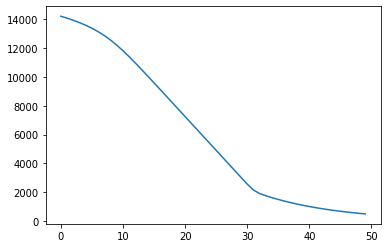

In [70]:
rng = jax.random.PRNGKey(2313)
xs, ys = train_set.sample(rng)
x = get_ap_series(ys)
e = electrogram(x)
plt.plot(e)
plt.show()